# Homework 4
In this homework, I analyze Costa Rican data to predict the poverty level of households. 

Thanks to [Kaggle](https://www.kaggle.com/c/costa-rican-household-poverty-prediction) for the data and the competition. Many many thanks to [Nelson](https://github.com/ngriffiths13/) for troubleshooting help and direction.

### Contents
1. Import packages and data
2. Clean data and address missing data
3. Testing different models
4. Final model selection and export to Kaggle


# Import Packages and Data

In [75]:
# Let's import necessary packages
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
#import packages for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
import setuptools

from xgboost import XGBClassifier
from tpot import TPOTClassifier

from sklearn.ensemble import GradientBoostingClassifier


#Silence warnings
import warnings
warnings.filterwarnings("ignore")


In [33]:
#Import poverty data
train = pd.read_csv(r"C:\Users\Cole\Documents\Machine Learning\Homework 4\train.csv")
test = pd.read_csv(r"C:\Users\Cole\Documents\Machine Learning\Homework 4\test.csv")

In [34]:
#The target we're predicting is the poverty level of heads of households
target = train.loc[(train['parentesco1']==1), 'Target']

In [35]:
#Let's get an idea for the values we have in each column
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [36]:
#Let's see the column headers and data types
pd.set_option('display.max_rows', 300)
train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

All right, it looks like we're got some solid data here. There are some categorical variables we'll need to take care of and probably some missing data we'll have to clean up. 

# Data Cleaning
Let's clean up the data and get it ready for modeling. Please note that I am cleaning both the training and test sets.

In [37]:
#Merge test and trainin set for cleaning
training_size = train.shape[0]
data = pd.concat((train.drop('Target', axis = 1), test)).reset_index(drop = True)
data = data.drop('Id', axis = 1)

### Missing Data
First let's take a look and see what missing data we have.

In [38]:
#Check for missing data
pd.concat([train.isnull().sum().sort_values(ascending=False),(train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)],axis=1,keys=['Total','Percentage'])

,Total,Percentage
rez_esc,7928,82.954902
v18q1,7342,76.823271
v2a1,6860,71.779847
meaneduc,5,0.052318
SQBmeaned,5,0.052318
techozinc,0,0.000000
techoentrepiso,0,0.000000
techocane,0,0.000000
techootro,0,0.000000
cielorazo,0,0.000000


That's not too bad, there's only 5 variables with missing data. 

### rez_esc
rez_esc represents the number of years behind in school a child is. According to [Wikipedia](https://en.wikipedia.org/wiki/Education_in_Costa_Rica), Costa Rican children attend school from ages 6-18. Even though a 19 yr old, two years behind in school would still be attending school, let's just assume that only kids 6-18 have this variable. We can impute these missing values with the median values, grouped by age.

In [39]:
#For anyone outside the school age range, we'll impute 0
data.loc[((data['age'] >= 19) | (data['age'] < 6)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0
#For anyone of school age, we'll impute the median value for their age
data['rez_esc'] = data.groupby('age')['rez_esc'].transform(lambda x: x.fillna(x.median()))

### v18q1
v18q1 represents the number of tablets a household owns. If the data is missing, it just means they don't have any tablets, so let's fill those with 0.

In [41]:
#Impute 0 for houses without tablets
data.v18q1 = data.v18q1.fillna(0)

### v2a1
v2a1 represents monthly rent payment. Since almost 7000 people don't have a rent payment, I wonder if some of them just own their houses outright. Let's take a look.

In [42]:
housing = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
ownership_data = data.loc[data['v2a1'].isnull(), housing].sum()
ownership_data.sort_values(ascending=False)


tipovivi1    20844
tipovivi5     2822
tipovivi4      597
tipovivi3        0
tipovivi2        0
dtype: int64

The data description shows what each of these binary variables mean: 
<br><br>tipovivi1: owned house, fully paid off
<br>tipovivi2: owned house, currently paying off
<br>tipovivi3: rented house
<br>tipovivi4: precarious housing
<br>tipovivi5: other(assigned,  borrowed)"
<br><br>
So it looks like most people who don't have a rent payment actually own their house outright, which makes sense. Since there are relatively few number of people in other cases, let's just impute the median values for them.

In [43]:
#Imputing 0 for rent payment for people who own their house
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0
#Imputing median rent payment for other missing values
data['v2a1'] = data.groupby('parentesco1')['v2a1'].transform(lambda x: x.fillna(x.median()))

### meaneduc & SQBmeaned
meaneduc and SQBmeaned represent the average years of education and squared average years of education for adults in the household. Let's impute this with the median value, grouped by years of schooling. 

In [44]:
#Impute median meaneduc grouped by years of schooling, then square it for SQBmeaned
data['meaneduc'] = data.groupby('escolari')['meaneduc'].transform(lambda x: x.fillna(x.median()))
data['SQBmeaned'] = (data.meaneduc)**2

### Categorical Variables
We still have 4 categorical variables: idhogar, dependency, edjefe, and edjefa. idhogar is a unique identifier for each household. We won't need this for modeling, so let's drop it. Looking at the data description, the other 3 have Yes/No values that can be changed to 1s and 0s.

In [45]:
#Drop idhogar
data = data.drop('idhogar', axis = 1)
#Replace Yes/No with 1/0 for the remaining categorical variables
categorical = ['dependency', 'edjefe', 'edjefa']
for col in categorical:
    data.loc[(data[col] == 'yes'), col]=1
    data.loc[(data[col] == 'no'), col]=0
data[categorical] = data[categorical].apply(pd.to_numeric)

Alright, it we've finshed cleaning the data. Now let's split the data back into training and test set.

In [46]:
train = data[:training_size]
x = train.loc[train['parentesco1']==1]
train = pd.concat([x, target], axis = 1)
test = data[training_size:]
train.shape, test.shape

((2973, 141), (23856, 140))

## Explore Data

Text(0.5, 1.0, 'Correlation between Variables')

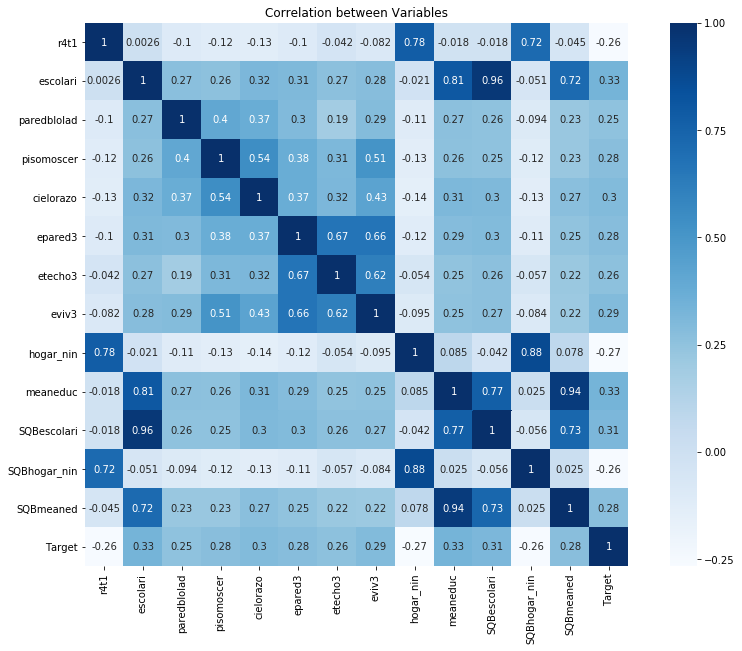

In [23]:
#Visualize most significant correlations
correlation = train.corr()
top_corr = correlation.index[abs(correlation["Target"])>0.25]
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.heatmap(train[top_corr].corr(), square = True, annot = True, cmap="Blues")
plot.set_title("Correlation between Variables")

It looks like all the education variables are strongly correlationed with poverty level. The quality of a home also correlates strongly. If house floors are nice, roofs are good, walls are high quality, or if the house has a ceiling, people are more likely to be well off. If households have more children, especially young children, they are more likely to be in poverty. Overall these make sense and pass the gut check. 

Now let's take a look at the distribution of the target variable.

([<matplotlib.axis.XTick at 0x2c029a3f668>,
 <a list of 4 Text xticklabel objects>)

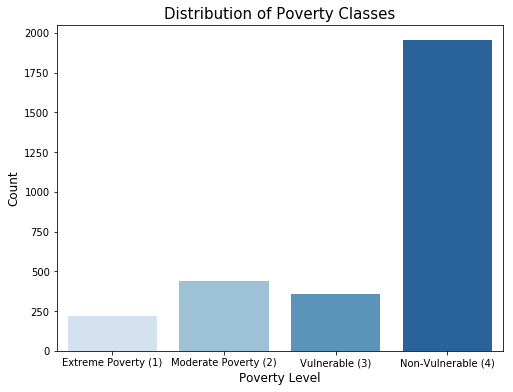

In [29]:
#See the distribution of poverty scores
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(train.Target,palette="Blues")
plt.title('Distribution of Poverty Classes', fontsize=15)
plt.xlabel('Poverty Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2, 3],['Extreme Poverty', 'Moderate Poverty', 'Vulnerable', 'Non-Vulnerable'])

Wow, it looks like the majority of our data falls in the Non-Vulnerable class. This imbalance of data will be a problem in modeling, because models can get a high accuracy score by just predicting that most people are Non-Vulnerable. Since our real objective is to predict which people are in extreme poverty, we'll have to fix this.

# Modeling
Now let's test a few different classification models, then deal with the imbalanced data.

In [47]:
#First make the train/test split for cross validation
x_train, x_test, y_train, y_test = train_test_split(x, target)

The first model we'll try is Random Forest. A [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [153]:
#Random Forest Model
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, class_weight='balanced', verbose=1, n_jobs=-1)
clf.fit(x_train, y_train)
test_predictions = clf.predict(x_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Test Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.18      0.22        60
           2       0.28      0.44      0.34        94
           3       0.28      0.18      0.22        97
           4       0.82      0.82      0.82       493

   micro avg       0.64      0.64      0.64       744
   macro avg       0.41      0.40      0.40       744
weighted avg       0.64      0.64      0.63       744



The random forest model did pretty well. Our weighted average f1 is 0.63. We have high precison and high recall for the Non-Vulnerable class. However our recall on the Extreme Poverty class is pretty low, probably due to the imbalanced data.

Next let's do a Gradient Boosting model. [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) uses multiple decision trees, building off the residuals from the previous tree, then summing the trees. 

In [166]:
#Gradient Boosting, with gridsearch to find the best hyperparameters
clf = GradientBoostingClassifier(verbose=1)
gridsearch = GridSearchCV(clf, {"learning_rate": [.1, .01, .001], "n_estimators": [100, 1000, 5000], 
                                'max_depth': [1, 2, 3]},verbose=1, n_jobs=-1)
gridsearch.fit(x_train, y_train,)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 17.6min finished


      Iter       Train Loss   Remaining Time 
         1        2652.9076            5.08m
         2        2651.3125            4.83m
         3        2649.7210            5.16m
         4        2648.1331            5.33m
         5        2646.5488            5.36m
         6        2644.9681            5.30m
         7        2643.3910            5.36m
         8        2641.8175            5.38m
         9        2640.2459            5.42m
        10        2638.6794            5.44m
        20        2623.1853            4.98m
        30        2608.0216            4.54m
        40        2593.1386            4.34m
        50        2578.5784            4.20m
        60        2564.3341            4.11m
        70        2550.3837            4.04m
        80        2536.7268            4.04m
        90        2523.2728            3.98m
       100        2510.0896            3.95m
       200        2391.9193            3.69m
       300        2292.6602            3.51m
       40

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 1000, 5000], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [167]:
print("Best Params: {}".format(gridsearch.best_params_))
print("\nClassification Report:")
print(classification_report(y_test, gridsearch.predict(x_test)))

Best Params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 5000}

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.15      0.23        62
           2       0.32      0.26      0.29        99
           3       0.44      0.08      0.14        97
           4       0.73      0.94      0.82       486

   micro avg       0.67      0.67      0.67       744
   macro avg       0.51      0.36      0.37       744
weighted avg       0.62      0.67      0.61       744



The Gradient Boosting model did ok, about the same with a slightly lower weighted avg f1, but with significantly higher precision for our poorest class.

XGBoost is pretty similar to gradient boosting, but let's do it just for fun. 

In [84]:
#XGBoost with a gridsearch for hyperparameter tuning
clf = XGBClassifier(verbose=1)
gridsearch = GridSearchCV(clf, {"learning_rate": [.1, .01, .001], "n_estimators": [100, 1000, 5000], 'max_depth': [1, 2, 3]},verbose=1, n_jobs=-1)
gridsearch.fit(x_train, y_train,)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=1)

In [86]:
print("Best Params: {}".format(gridsearch.best_params_))
print(classification_report(y_test, clf.predict(x_test)))

Best Params: {'colsample_bytree': 1.0, 'gamma': 0.5, 'min_child_weight': 1, 'subsample': 0.6}
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        52
           2       0.59      0.11      0.18        94
           3       0.00      0.00      0.00        99
           4       0.69      1.00      0.82       499

   micro avg       0.68      0.68      0.68       744
   macro avg       0.32      0.28      0.25       744
weighted avg       0.54      0.68      0.57       744



# Imbalanced Data
Let's take care of the imbalanced data! A common method of addressing imabalanced data is oversampling. Oversampling works by continuing to sample underbalanced classes until all classes have the same amount of data. I'll be using a random oversampling technique from [Imblearn.](https://imbalanced-learn.readthedocs.io/en/stable/index.html)

In [90]:
#Use random oversamplin to created new balanced data sets
RandSamp = RandomOverSampler(random_state=0)
x_balanced, y_balanced = RandSamp.fit_resample(x_train, y_train)

([<matplotlib.axis.XTick at 0x2c039040f28>,
 <a list of 4 Text xticklabel objects>)

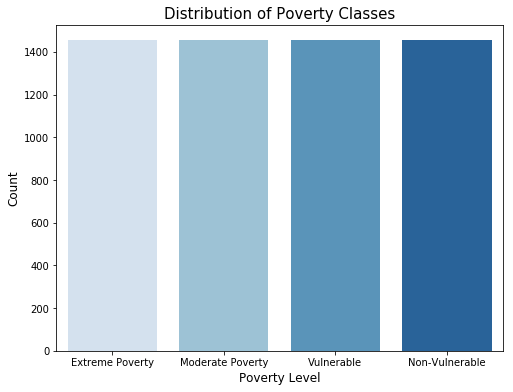

In [91]:
#See the distribution of poverty scores after oversampling
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y_balanced,palette="Blues")
plt.title('Distribution of Poverty Classes', fontsize=15)
plt.xlabel('Poverty Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2, 3],['Extreme Poverty', 'Moderate Poverty', 'Vulnerable', 'Non-Vulnerable'])

Woohoo! That's some balanced data right there. Let's go ahead and run our Random Forest and Gradient Boost models again with the newly balanced data.

In [94]:
GB = GradientBoostingClassifier(learning_rate = 0.001, max_depth = 3, n_estimators = 5000)
GB.fit(x_balanced, y_balanced,)
print("Balanced GB Model")
print(classification_report(y_test, GB.predict(x_test)))
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, class_weight='balanced', n_jobs=-1)
RF.fit(x_balanced, y_balanced,)
print("Balanced RF Model")
print(classification_report(y_test, RF.predict(x_test)))

Balanced GB Model
              precision    recall  f1-score   support

           1       0.17      0.27      0.21        52
           2       0.27      0.44      0.33        94
           3       0.28      0.34      0.31        99
           4       0.88      0.69      0.77       499

   micro avg       0.58      0.58      0.58       744
   macro avg       0.40      0.43      0.41       744
weighted avg       0.67      0.58      0.62       744

Balanced RF Model
              precision    recall  f1-score   support

           1       0.20      0.25      0.22        52
           2       0.30      0.44      0.36        94
           3       0.23      0.25      0.24        99
           4       0.85      0.75      0.79       499

   micro avg       0.61      0.61      0.61       744
   macro avg       0.40      0.42      0.40       744
weighted avg       0.65      0.61      0.63       744



Wow, that looks a lot better. We are able to predict the Extreme Poverty class with much better recall. Though there are tradeoffs, the oversampling allows us to better accomplish our end goal of predicting poverty. 

In conclusion, we clean up the data, tested some classification models, tuned hyperparameters, and corrected the data imbalance. Our model is useful, though not perfect. It would certainly help in identifying families in extreme poverty. If I had more time, I would have further tuned my models, experimented with stacking, and tested feature engineering.